###Social Analytics - Twitter API Sept 15, 2018
###News Mood
**Major news sources in the US (including BBC) are typically described as negative; but is this true?**. 
In the following analysis, we will put this status quo "all news in negative" to the test by utilizing a nifty package in Python called Vader Sentiment Analysis. Generally speaking, Vader uses an algorithm to score social media text under three categories: Positive, Negative or Neutral. Then, utilizing a 'z-score', Vader normalizes the three scores to form a Compound score on a scale from -1 to 1 (1 being the most positive and -1 being the most negative).

*The most positive*:
In our analysis, it is evident that BBC news displayed the highest propensity to positive tweeting (as well as negative): the most recent tweets (< 20 tweets ago) were both highly negative and highly positive tweets (Max compound score at 0.3038 polarity). The start of the BBC news tweet stream was consistently  in the mid singles (0.05-.08). The second most positive tweets came from CBS with Compound scores in the mid singles throughout the last 100 tweets. Fox is very hard to see in the plot as it is overshadowed by CNN; it appears CNN and Fox are at least highly correlated for these 100 tweets; although the tweets may have nothing to do with each other.

*The most negative*:
The New York Times was the most negative news source of all with an average compound score of 0.00265. 

Despite the differences in news coverage, the five sources all seem to converge to a moderately positive but basically neutral twitter sentiment. Interestingly, I pulled tweets once around 0630 PM and then again at 0705 PM, and BBC had the widest swing in polarity but still remained the most positive. At my 0630 PM pull, BBC had zero negative tweets. 



*Source: Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.*

In [3]:
#First imprt depenedencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [5]:
#Setup our Tweepy API Authentication settings
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [107]:
#Target Users
target_users = ['@BBC','@CBS','@CNN','@FoxNews','@nytimes']


#Initialize lusts and counter for looping 

tweets_ago = 1

# List to hold results
results_list = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through all target users
for target in target_users:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    
    

    # Loop through 10 times
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=20, result_type="recent", max_id=oldest_tweet, lang = 'en')

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

                      
                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                text = tweet["text"]
                time_tweet = tweet["created_at"]

                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
      
                # Store the Average Sentiments
                results_list.append( {
                "User": target,
                "Text": text,
                "Time of Tweet": time_tweet,
                "Compound": np.mean(compound_list),
                "Positive": np.mean(positive_list),
                "Neutral": np.mean(negative_list),
                "Negative": np.mean(neutral_list),
                "Tweet Count": len(compound_list),
                "Tweets Ago": tweets_ago
                })

                #increment counter
                tweets_ago += 1
    
print(results_list)

[{'User': '@BBC', 'Text': 'RT @TomLondon6: Why does @BBC give more airtime to Julia Hartley-Brewer @JuliaHB1 than to the entire 13.5 million people in the UK living i…', 'Time of Tweet': 'Sun Sep 16 02:10:15 +0000 2018', 'Compound': 0.0, 'Positive': 0.0, 'Neutral': 0.0, 'Negative': 1.0, 'Tweet Count': 1, 'Tweets Ago': 1}, {'User': '@BBC', 'Text': "@BBC @HoneyBadgerBite Thanks for retweeting.\nUnimaginably evil, I can't imagine the trauma... The only upside is th… https://t.co/UIgN517SG9", 'Time of Tweet': 'Sun Sep 16 02:10:11 +0000 2018', 'Compound': -0.1806, 'Positive': 0.065, 'Neutral': 0.0985, 'Negative': 0.8365, 'Tweet Count': 2, 'Tweets Ago': 2}, {'User': '@BBC', 'Text': 'RT @judithnwana: #Cameroon: Student police officers to reinforce security ahead of Presidential election as #SouthernCameroons conflict esc…', 'Time of Tweet': 'Sun Sep 16 02:09:19 +0000 2018', 'Compound': -0.11180000000000001, 'Positive': 0.084, 'Neutral': 0.10466666666666667, 'Negative': 0.8113333333333334, 'Tw

In [193]:
news_sent_df = pd.DataFrame.from_dict(results_list)
news_sent_df.to_csv("Twitter News Sentiment.csv")
#make a copy of the data frame just in case
news_sent_df_2 = news_sent_df.copy()
news_sent_df_2.head(4)
news_sent_df.sort_values(by = ['Tweets Ago'], ascending = False, inplace = True)

In [109]:
news_sent_df.describe()


,Compound,Negative,Neutral,Positive,Tweet Count,Tweets Ago
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.031400,0.826277,0.078243,0.095392,250.500000,250.500000
std,0.029593,0.022606,0.004653,0.020046,144.481833,144.481833
min,-0.180600,0.737111,0.000000,0.000000,1.000000,1.000000
25%,0.017351,0.811018,0.076653,0.080467,125.750000,125.750000
50%,0.026243,0.832610,0.077657,0.089302,250.500000,250.500000
75%,0.042200,0.843606,0.079610,0.108987,375.250000,375.250000
max,0.219580,1.000000,0.104667,0.186444,500.000000,500.000000


In [111]:
#lets make sure we pulled only the major news sources we intended to and then look at head of first 15 rows:
uniques = news_sent_df["User"].unique()
print(uniques)
news_sent_df.head(15)


['@BBC' '@CBS' '@CNN' '@FoxNews' '@nytimes']


,Compound,Negative,Neutral,Positive,Text,Time of Tweet,Tweet Count,Tweets Ago,User
0,0.000000,1.000000,0.000000,0.000000,RT @TomLondon6: Why does @BBC give more airtim...,Sun Sep 16 02:10:15 +0000 2018,1,1,@BBC
1,-0.180600,0.836500,0.098500,0.065000,@BBC @HoneyBadgerBite Thanks for retweeting.\n...,Sun Sep 16 02:10:11 +0000 2018,2,2,@BBC
2,-0.111800,0.811333,0.104667,0.084000,RT @judithnwana: #Cameroon: Student police off...,Sun Sep 16 02:09:19 +0000 2018,3,3,@BBC
3,0.016625,0.797000,0.098250,0.104750,RT @georgegalloway: Dear @BBC In 2002 #JohnMal...,Sun Sep 16 02:09:15 +0000 2018,4,4,@BBC
4,0.013300,0.837600,0.078600,0.083800,@BBC @bbcthree More money for @bbcthree!,Sun Sep 16 02:09:10 +0000 2018,5,5,@BBC
5,0.002483,0.820333,0.088167,0.091333,RT @Secominfo: Colonial Dogvernor tries to per...,Sun Sep 16 02:07:41 +0000 2018,6,6,@BBC
6,0.059543,0.810857,0.086857,0.102143,RT @georgegalloway: Dear @BBC In 2002 #JohnMal...,Sun Sep 16 02:07:32 +0000 2018,7,7,@BBC
7,0.102337,0.803750,0.085875,0.110250,RT @georgegalloway: Dear @BBC In 2002 #JohnMal...,Sun Sep 16 02:06:44 +0000 2018,8,8,@BBC
8,0.177378,0.737111,0.076333,0.186444,"@Darksonic22 @BBC Agree, agree, agree!",Sun Sep 16 02:06:44 +0000 2018,9,9,@BBC
9,0.219580,0.748300,0.068700,0.182900,RT @marvelous_lie: @BBC @GyakutennoMeg And yet...,Sun Sep 16 02:05:18 +0000 2018,10,10,@BBC


In [199]:
#Creating data sets for each major news source; going to sort in descending order as it may help later with plotting
BBC_set = news_sent_df[news_sent_df["User"]=="@BBC"]
BBC_set.head(15)

,Compound,Negative,Neutral,Positive,Text,Time of Tweet,Tweet Count,Tweets Ago,User
99,0.067395,0.793750,0.082150,0.123950,RT @StockMonsterUSA: Watch out @BBC. Pompeo's ...,Sun Sep 16 01:58:12 +0000 2018,100,100,@BBC
98,0.068076,0.791667,0.082980,0.125202,RT @n454h_: @realDonaldTrump You have special ...,Sun Sep 16 01:59:02 +0000 2018,99,99,@BBC
97,0.067464,0.793133,0.082296,0.124429,@BBC Crying shame what happened to @bbcthree. ...,Sun Sep 16 01:59:20 +0000 2018,98,98,@BBC
96,0.072096,0.796371,0.079742,0.123742,RT @georgegalloway: Dear @BBC In 2002 #JohnMal...,Sun Sep 16 01:59:54 +0000 2018,97,97,@BBC
95,0.068660,0.796813,0.079750,0.123292,@ProfFrancesca @BBC So right. Two preachers tu...,Sun Sep 16 01:59:56 +0000 2018,96,96,@BBC
94,0.069383,0.794674,0.080589,0.124589,lutávio é melhor do que vários casais por ai q...,Sun Sep 16 02:00:32 +0000 2018,95,95,@BBC
93,0.073270,0.793596,0.080340,0.125915,RT @AlokKum22017698: माननीय मुख्यमंत्री जी/प्र...,Sun Sep 16 02:02:08 +0000 2018,94,94,@BBC
92,0.074058,0.791376,0.081204,0.127269,RT @rsdass1819: #हरियाणा_में_आतंक हरियाणा में ...,Sun Sep 16 02:03:11 +0000 2018,93,93,@BBC
91,0.074863,0.789109,0.082087,0.128652,RT @SameerJainleo: Why the govt is desperate t...,Sun Sep 16 02:04:39 +0000 2018,92,92,@BBC
90,0.079182,0.787879,0.081901,0.130066,"@BBC Please note my emails, social media, comp...",Sun Sep 16 02:04:48 +0000 2018,91,91,@BBC


In [200]:
#Creating and viewing the CBS set
CBS_set = news_sent_df[news_sent_df["User"]=="@CBS"]

CBS_set.head(15)


,Compound,Negative,Neutral,Positive,Text,Time of Tweet,Tweet Count,Tweets Ago,User
199,0.026930,0.825650,0.077600,0.096650,"RT @MrsSOsbourne: My cat, Tiger Lilly, is miss...",Sun Sep 16 02:03:07 +0000 2018,200,200,@CBS
198,0.027835,0.825085,0.077678,0.097136,RT @conner_omalley: ALL TALK SHOW HOSTS ARE CO...,Sun Sep 16 02:03:44 +0000 2018,199,199,@CBS
197,0.023859,0.825348,0.078071,0.096480,RT @TIMESUPNOW: Six women have courageously sh...,Sun Sep 16 02:04:09 +0000 2018,198,198,@CBS
196,0.026954,0.826858,0.076970,0.096071,@yglesiasj87 @meporrata I agree @GOP's $1Trill...,Sun Sep 16 02:04:11 +0000 2018,197,197,@CBS
195,0.023782,0.827306,0.077362,0.095230,.@Patriots fans - THIS.......will get you read...,Sun Sep 16 02:04:44 +0000 2018,196,196,@CBS
194,0.024036,0.827723,0.077097,0.095082,"RT @MrsSOsbourne: My cat, Tiger Lilly, is miss...",Sun Sep 16 02:04:52 +0000 2018,195,195,@CBS
193,0.024949,0.827155,0.077175,0.095572,"RT @MrsSOsbourne: My cat, Tiger Lilly, is miss...",Sun Sep 16 02:05:11 +0000 2018,194,194,@CBS
192,0.025872,0.826580,0.077254,0.096067,RT @tellthetruth69: @OMGno2trump Can every per...,Sun Sep 16 02:05:40 +0000 2018,193,193,@CBS
191,0.026007,0.825677,0.077656,0.096568,@RobertDRoseJr1 @PressSec @realDonaldTrump @PO...,Sun Sep 16 02:06:01 +0000 2018,192,192,@CBS
190,0.026143,0.824764,0.078063,0.097073,@CoreyChadwick42 @LaurieKafka @davidmweissman ...,Sun Sep 16 02:07:30 +0000 2018,191,191,@CBS


In [201]:
#Creating a CNN set
CNN_set = news_sent_df[news_sent_df["User"]=="@CNN"]
CNN_set.head(15)


,Compound,Negative,Neutral,Positive,Text,Time of Tweet,Tweet Count,Tweets Ago,User
299,0.028982,0.837917,0.076883,0.085133,@iamgavinjames @arenbean @CNN @andersoncooper ...,Sun Sep 16 02:12:50 +0000 2018,300,300,@CNN
298,0.029079,0.837375,0.077140,0.085418,RT @BeckySpartacus: Are they auditioning for @...,Sun Sep 16 02:12:51 +0000 2018,299,299,@CNN
297,0.029176,0.836829,0.077399,0.085705,RT @ClarenceMack3: @ActifyPress @Of_the_People...,Sun Sep 16 02:12:52 +0000 2018,298,298,@CNN
296,0.029274,0.836279,0.077660,0.085993,@PhilMcCrackin44 @CNN @jaketapper @donlemon @C...,Sun Sep 16 02:12:52 +0000 2018,297,297,@CNN
295,0.029373,0.835726,0.077922,0.086284,"RT @CNN: Pluto is most definitely a planet, sa...",Sun Sep 16 02:12:52 +0000 2018,296,296,@CNN
294,0.028960,0.835953,0.077837,0.086142,@StuOstro @mikeseidel Great audition for @CNN....,Sun Sep 16 02:12:53 +0000 2018,295,295,@CNN
293,0.026674,0.836997,0.077633,0.085303,RT @BeckySpartacus: Are they auditioning for @...,Sun Sep 16 02:12:53 +0000 2018,294,294,@CNN
292,0.026765,0.836440,0.077898,0.085594,RT @drawandstrike: KEEP UP THE BRILLIANT WORK ...,Sun Sep 16 02:12:54 +0000 2018,293,293,@CNN
291,0.024450,0.836808,0.078164,0.084959,RT @BeckySpartacus: Are they auditioning for @...,Sun Sep 16 02:12:54 +0000 2018,292,292,@CNN
290,0.024534,0.836247,0.078433,0.085251,@CNN Fake News! https://t.co/7lARW5A5In,Sun Sep 16 02:12:54 +0000 2018,291,291,@CNN


In [203]:
#Creating a fox news set
FoxNews_Set = news_sent_df[news_sent_df["User"]=="@FoxNews"]
FoxNews_Set.describe()
FoxNews_Set.head(15)
#FoxNews_Set.sort_values(by=['Tweets Ago'], ascending = False)

,Compound,Negative,Neutral,Positive,Text,Time of Tweet,Tweet Count,Tweets Ago,User
399,0.016207,0.845187,0.075200,0.079563,RT @FoxNews: Michael Barone: If Democrats can’...,Sun Sep 16 02:12:54 +0000 2018,400,400,@FoxNews
398,0.016248,0.844799,0.075388,0.079762,@EveHammond13 @dbongino @DaleyDaley03 @FoxNews...,Sun Sep 16 02:12:54 +0000 2018,399,399,@FoxNews
397,0.014591,0.845211,0.075578,0.079161,RT @FoxNews: Psychology professor: Why do some...,Sun Sep 16 02:12:54 +0000 2018,398,398,@FoxNews
396,0.014628,0.844821,0.075768,0.079360,@Sinister_Arbor @NW_StayDet @BenSFletcher @Orv...,Sun Sep 16 02:12:55 +0000 2018,397,397,@FoxNews
395,0.016423,0.845164,0.075225,0.079561,RT @andylassner: I’m sure @FoxNews is all over...,Sun Sep 16 02:12:55 +0000 2018,396,396,@FoxNews
394,0.015659,0.845180,0.075415,0.079354,@FoxNews is this pronouncement the sum total o...,Sun Sep 16 02:12:57 +0000 2018,395,395,@FoxNews
393,0.015699,0.844787,0.075607,0.079556,RT @FoxNews: .@dbongino: “How is John Kerry no...,Sun Sep 16 02:12:57 +0000 2018,394,394,@FoxNews
392,0.014912,0.844779,0.075799,0.079372,RT @GovMikeHuckabee: Right after Huckabee on @...,Sun Sep 16 02:12:58 +0000 2018,393,393,@FoxNews
391,0.014950,0.844383,0.075992,0.079574,RT @FoxNews: John Kerry: Trump Has 'Maturity o...,Sun Sep 16 02:12:59 +0000 2018,392,392,@FoxNews
390,0.016066,0.844345,0.075826,0.079777,@FoxNews @AlohaHa59067534 You mean an outright...,Sun Sep 16 02:13:00 +0000 2018,391,391,@FoxNews


In [204]:
NYT_Set = news_sent_df[news_sent_df["User"]=="@nytimes"]
NYT_Set.describe()
NYT_Set.head(15)
#NYT_Set.sort_values(by=['Tweets Ago'], ascending = False)

,Compound,Negative,Neutral,Positive,Text,Time of Tweet,Tweet Count,Tweets Ago,User
499,-0.007929,0.850440,0.077920,0.071590,RT @adampeacock3: Stats. Facts.\nTennis; Grand...,Sun Sep 16 02:12:33 +0000 2018,500,500,@nytimes
498,-0.008151,0.850637,0.077846,0.071467,RT @nytimes: The parents of a 2-year-old boy w...,Sun Sep 16 02:12:37 +0000 2018,499,499,@nytimes
497,-0.009315,0.850616,0.078002,0.071331,@TimRunsHisMouth @nytimes 💩 not worthy to be m...,Sun Sep 16 02:12:37 +0000 2018,498,498,@nytimes
496,-0.008648,0.850676,0.077799,0.071475,RT @tellthetruth69: @OMGno2trump Can every per...,Sun Sep 16 02:12:39 +0000 2018,497,497,@nytimes
495,-0.008665,0.850375,0.077956,0.071619,@falling_stone @rangersfan1966 @plqman @nytime...,Sun Sep 16 02:12:41 +0000 2018,496,496,@nytimes
494,-0.008040,0.850358,0.077828,0.071764,RT @MagaMama610: If #America vetted trespasser...,Sun Sep 16 02:12:41 +0000 2018,495,495,@nytimes
493,-0.008067,0.850457,0.077785,0.071706,RT @Zimrico: We know you don't care.\n@CNN @MS...,Sun Sep 16 02:12:41 +0000 2018,494,494,@nytimes
492,-0.007297,0.850440,0.077657,0.071852,RT @goddessjustita: @realDonaldTrump @nytimes ...,Sun Sep 16 02:12:44 +0000 2018,493,493,@nytimes
491,-0.007312,0.850136,0.077815,0.071998,RT @nytimes: Move over Usain Bolt. Running's s...,Sun Sep 16 02:12:46 +0000 2018,492,492,@nytimes
490,-0.007327,0.849831,0.077974,0.072145,@nytimes I think it’s the whole body and extra...,Sun Sep 16 02:12:48 +0000 2018,491,491,@nytimes


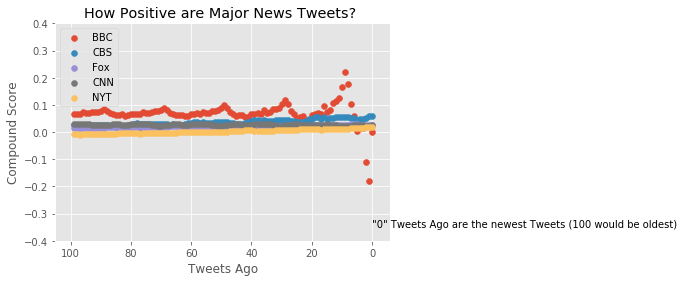

In [192]:
#BBC Scatter Plot 
x_axis = np.arange(0,100,1)
#print(x_axis)
#Make it pretty with R's ggplot2 style (oh so good!) but for some reason ggplot in python wouldnt load :(
plt.style.use('ggplot')
BBC_plot = plt.scatter(x_axis,BBC_set["Compound"], alpha = 0.99, label = "BBC")
CBS_plot = plt.scatter(x_axis,CBS_set["Compound"], alpha = 0.99,label = "CBS")
Fox_plot = plt.scatter(x_axis,FoxNews_Set["Compound"], alpha = 0.99,label = "Fox")
CNN_plot = plt.scatter(x_axis,CNN_set["Compound"], alpha = 0.99,label = "CNN")
NYT_plot = plt.scatter(x_axis,NYT_Set["Compound"],alpha = 0.99,label = "NYT")


plt.xlabel('Tweets Ago')
#passing in an argument within matplot lib to invert the X-axis so it is easier for the reader to visualize time
plt.gca().invert_xaxis()
plt.ylabel('Compound Score')
plt.ylim(-.4,.4)
plt.title(f"How Positive are Major News Tweets? ")
plt.legend(handles = [BBC_plot,CBS_plot,Fox_plot,CNN_plot,NYT_plot], loc = "best")
plt.annotate('"0" Tweets Ago are the newest Tweets (100 would be oldest)',(0,-.35))
#plt.annotate(equation,(80,60))
plt.savefig('Analysis of Tweets by News Source (last 100).png')

          Compound
User              
@BBC      0.069697
@CBS      0.036865
@CNN      0.026658
@FoxNews  0.021166
@nytimes  0.002615


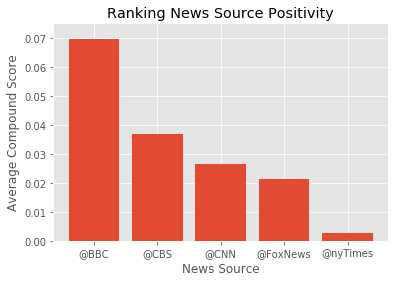

In [172]:
#Combine averages into a dataframe; I am using pivot table bahahahahahahaah
news_combined_df = pd.pivot_table(news_sent_df, values = 'Compound',index = 'User',
                              aggfunc = np.mean)
news_combined_df_2 = pd.DataFrame(news_combined_df)
print(news_combined_df_2)
x = np.arange(5)
plt.bar(x, news_combined_df_2["Compound"])

#plt.xticks(x,news_combined_df_2["User"])
plt.xlabel('News Source')
plt.ylabel('Average Compound Score')
plt.title(f"Ranking News Source Positivity")
tick_locations = [value for value in x]
plt.xticks(tick_locations, ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nyTimes"])
plt.ylim(0.0,0.075)
plt.savefig('Ranking News Source Positivity.png')